In [114]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [115]:
# plot 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.set(font="Malgun Gothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')
# sns.set(rc = {'figure.figsize':(5,15)})

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoost
import warnings
warnings.filterwarnings(action='ignore')

In [117]:
# 2015년부터 있는 데이터
df = pd.read_csv('테슬라 총합.csv', index_col=0)

In [118]:
df.columns

Index(['date', 'tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee',
       'oli_price', 'oli_price_volatility', 'carbon_credits',
       'carbon_credits_volatility', 'EVE종가', 'EVE거래량', 'EVE변동률', 'BYD종가',
       'BYD거래량', 'BYD변동률', 'PSI종가', 'PSI거래량', 'SOXX종가', 'SOXX거래량', 'SOXL종가',
       'SOXL거래량', 'LIT조정종가', 'LIT거래량', 'SGL종가', 'SGL변동률', 'li_price', 'co',
       'co_volatility', '희토류가격', 'nasdaq', 'nasdaq_거래량', 'nasdaq_volatility',
       'ssec', 'ssec_거래량', 'ssec_volatility', 'dollar', 'dollar_volatility',
       'alu_price', 'alu_vol', 'alu_change', 'cu_price', 'cu_change',
       'REGI_price', 'REGI_vol', 'REGI_change', 'snp_500',
       'snp_500_volatility'],
      dtype='object')

In [119]:
# 3일 shift
df.tesla = df.tesla.shift(-3)
df.dropna(inplace=True)
df.date = pd.to_datetime(df.date)

In [120]:
y = df.tesla
x = df.drop(['date','tesla', 'elec_fee', 'tesla_volatility'], axis=1)

In [121]:
# 75 : 25 비율
x_train, x_test = x.iloc[:1350], x.iloc[1350:]
y_train, y_test = y.iloc[:1350], y.iloc[1350:]

In [122]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [123]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.8733597986176896
lr_test : -2.4928122656119274
rid_train : 0.8726124619715773
rid_test : -2.594366785551506
las_train : 0.7720369895980269
las_test : -2.6423625153426107
xgb_train : 0.9999563313984102
xgb_test : -4.494306045192062
lgbm_train : 0.9834681259554874
lgbm_test : -4.67367782283847
ela_train : 0.7260072982168077
ela_test : -3.266630558581719


In [124]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.042931
0:	learn: 23.0211217	total: 3.82ms	remaining: 3.82s
1:	learn: 22.2548162	total: 7.31ms	remaining: 3.65s
2:	learn: 21.5380446	total: 11.2ms	remaining: 3.72s
3:	learn: 20.8212013	total: 14.4ms	remaining: 3.59s
4:	learn: 20.1790646	total: 17.7ms	remaining: 3.53s
5:	learn: 19.5302990	total: 21.2ms	remaining: 3.52s
6:	learn: 18.9142069	total: 24.8ms	remaining: 3.52s
7:	learn: 18.3490814	total: 28.1ms	remaining: 3.48s
8:	learn: 17.7935627	total: 31.6ms	remaining: 3.47s
9:	learn: 17.2809164	total: 35ms	remaining: 3.47s
10:	learn: 16.8073203	total: 38.5ms	remaining: 3.46s
11:	learn: 16.3034846	total: 41.9ms	remaining: 3.45s
12:	learn: 15.8206770	total: 45.3ms	remaining: 3.44s
13:	learn: 15.4280224	total: 48.7ms	remaining: 3.43s
14:	learn: 15.0442831	total: 52.4ms	remaining: 3.44s
15:	learn: 14.5983175	total: 55.8ms	remaining: 3.43s
16:	learn: 14.2073465	total: 59.3ms	remaining: 3.43s
17:	learn: 13.8033637	total: 62.4ms	remaining: 3.4s
18:	learn: 13.4326241	total: 

161:	learn: 4.1543594	total: 522ms	remaining: 2.7s
162:	learn: 4.1426340	total: 525ms	remaining: 2.7s
163:	learn: 4.1284657	total: 529ms	remaining: 2.7s
164:	learn: 4.1203567	total: 533ms	remaining: 2.7s
165:	learn: 4.1087230	total: 537ms	remaining: 2.7s
166:	learn: 4.0970429	total: 541ms	remaining: 2.7s
167:	learn: 4.0857375	total: 545ms	remaining: 2.7s
168:	learn: 4.0778998	total: 548ms	remaining: 2.7s
169:	learn: 4.0685963	total: 552ms	remaining: 2.69s
170:	learn: 4.0598996	total: 556ms	remaining: 2.7s
171:	learn: 4.0432300	total: 560ms	remaining: 2.7s
172:	learn: 4.0282413	total: 564ms	remaining: 2.7s
173:	learn: 4.0215169	total: 568ms	remaining: 2.69s
174:	learn: 4.0112100	total: 571ms	remaining: 2.69s
175:	learn: 4.0007461	total: 575ms	remaining: 2.69s
176:	learn: 3.9917718	total: 578ms	remaining: 2.69s
177:	learn: 3.9845032	total: 582ms	remaining: 2.69s
178:	learn: 3.9753797	total: 595ms	remaining: 2.73s
179:	learn: 3.9574120	total: 598ms	remaining: 2.73s
180:	learn: 3.9505283	t

355:	learn: 2.5320374	total: 1.23s	remaining: 2.23s
356:	learn: 2.5272144	total: 1.24s	remaining: 2.23s
357:	learn: 2.5242458	total: 1.24s	remaining: 2.22s
358:	learn: 2.5208689	total: 1.24s	remaining: 2.22s
359:	learn: 2.5153823	total: 1.25s	remaining: 2.22s
360:	learn: 2.5134591	total: 1.25s	remaining: 2.21s
361:	learn: 2.5118643	total: 1.25s	remaining: 2.21s
362:	learn: 2.5098368	total: 1.26s	remaining: 2.21s
363:	learn: 2.5034040	total: 1.26s	remaining: 2.2s
364:	learn: 2.5015120	total: 1.26s	remaining: 2.2s
365:	learn: 2.4913427	total: 1.27s	remaining: 2.19s
366:	learn: 2.4863450	total: 1.27s	remaining: 2.19s
367:	learn: 2.4795419	total: 1.27s	remaining: 2.19s
368:	learn: 2.4770106	total: 1.28s	remaining: 2.19s
369:	learn: 2.4700415	total: 1.29s	remaining: 2.19s
370:	learn: 2.4669579	total: 1.29s	remaining: 2.19s
371:	learn: 2.4606369	total: 1.29s	remaining: 2.18s
372:	learn: 2.4539071	total: 1.3s	remaining: 2.18s
373:	learn: 2.4491824	total: 1.3s	remaining: 2.18s
374:	learn: 2.44

561:	learn: 1.7283820	total: 1.94s	remaining: 1.51s
562:	learn: 1.7271303	total: 1.95s	remaining: 1.51s
563:	learn: 1.7246132	total: 1.95s	remaining: 1.51s
564:	learn: 1.7195912	total: 1.95s	remaining: 1.5s
565:	learn: 1.7175488	total: 1.95s	remaining: 1.5s
566:	learn: 1.7162018	total: 1.96s	remaining: 1.49s
567:	learn: 1.7148372	total: 1.96s	remaining: 1.49s
568:	learn: 1.7118461	total: 1.96s	remaining: 1.49s
569:	learn: 1.7099370	total: 1.97s	remaining: 1.48s
570:	learn: 1.7096223	total: 1.97s	remaining: 1.48s
571:	learn: 1.7091919	total: 1.97s	remaining: 1.48s
572:	learn: 1.7058499	total: 1.97s	remaining: 1.47s
573:	learn: 1.7025218	total: 1.98s	remaining: 1.47s
574:	learn: 1.6988719	total: 1.98s	remaining: 1.46s
575:	learn: 1.6967377	total: 1.98s	remaining: 1.46s
576:	learn: 1.6938798	total: 1.99s	remaining: 1.46s
577:	learn: 1.6907023	total: 2s	remaining: 1.46s
578:	learn: 1.6870353	total: 2s	remaining: 1.46s
579:	learn: 1.6835039	total: 2.01s	remaining: 1.45s
580:	learn: 1.680459

725:	learn: 1.3519536	total: 2.47s	remaining: 934ms
726:	learn: 1.3485885	total: 2.48s	remaining: 930ms
727:	learn: 1.3461975	total: 2.48s	remaining: 927ms
728:	learn: 1.3450088	total: 2.48s	remaining: 923ms
729:	learn: 1.3428526	total: 2.49s	remaining: 920ms
730:	learn: 1.3409674	total: 2.49s	remaining: 917ms
731:	learn: 1.3389012	total: 2.49s	remaining: 913ms
732:	learn: 1.3379261	total: 2.5s	remaining: 910ms
733:	learn: 1.3373978	total: 2.5s	remaining: 906ms
734:	learn: 1.3353070	total: 2.5s	remaining: 903ms
735:	learn: 1.3340103	total: 2.51s	remaining: 899ms
736:	learn: 1.3317219	total: 2.51s	remaining: 896ms
737:	learn: 1.3292660	total: 2.51s	remaining: 892ms
738:	learn: 1.3270718	total: 2.52s	remaining: 889ms
739:	learn: 1.3259107	total: 2.52s	remaining: 885ms
740:	learn: 1.3229832	total: 2.52s	remaining: 882ms
741:	learn: 1.3189803	total: 2.52s	remaining: 878ms
742:	learn: 1.3168500	total: 2.53s	remaining: 875ms
743:	learn: 1.3146448	total: 2.53s	remaining: 871ms
744:	learn: 1.3

898:	learn: 1.0360118	total: 3s	remaining: 337ms
899:	learn: 1.0341622	total: 3.01s	remaining: 334ms
900:	learn: 1.0320274	total: 3.01s	remaining: 331ms
901:	learn: 1.0304594	total: 3.01s	remaining: 327ms
902:	learn: 1.0302204	total: 3.02s	remaining: 324ms
903:	learn: 1.0297322	total: 3.02s	remaining: 321ms
904:	learn: 1.0281993	total: 3.02s	remaining: 317ms
905:	learn: 1.0270024	total: 3.02s	remaining: 314ms
906:	learn: 1.0247281	total: 3.03s	remaining: 310ms
907:	learn: 1.0229021	total: 3.03s	remaining: 307ms
908:	learn: 1.0218039	total: 3.03s	remaining: 304ms
909:	learn: 1.0212904	total: 3.04s	remaining: 300ms
910:	learn: 1.0197982	total: 3.04s	remaining: 297ms
911:	learn: 1.0170663	total: 3.04s	remaining: 294ms
912:	learn: 1.0150994	total: 3.04s	remaining: 290ms
913:	learn: 1.0138497	total: 3.05s	remaining: 287ms
914:	learn: 1.0122501	total: 3.05s	remaining: 283ms
915:	learn: 1.0110358	total: 3.05s	remaining: 280ms
916:	learn: 1.0086080	total: 3.06s	remaining: 277ms
917:	learn: 1.0

In [125]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.8733597986009745
rid_test : -2.4928282305068543
alpha = 0.0005
rid_train : 0.8733597982002421
rid_test : -2.49289205384318
alpha = 0.001
rid_train : 0.8733597969500502
rid_test : -2.492971751740553
alpha = 0.005
rid_train : 0.8733597573467216
rid_test : -2.493606136638923
alpha = 0.01
rid_train : 0.8733596355382938
rid_test : -2.494391367013099
alpha = 0.05
rid_train : 0.8733560477809771
rid_test : -2.5004050632322077
alpha = 0.1
rid_train : 0.8733459406988356
rid_test : -2.5073959430869373
alpha = 0.5
rid_train : 0.8731139220962774
rid_test : -2.5525250681346154
alpha = 1
rid_train : 0.8726124619715773
rid_test : -2.594366785551506
alpha = 5
rid_train : 0.8682697614449021
rid_test : -2.7356260531679073
alpha = 10
rid_train : 0.8647996965294118
rid_test : -2.789806265737966
alpha = 100
rid_train : 0.8375404719033218
rid_test : -2.975987540373979


In [126]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.8731664780000089
las_test : -2.5099658776040092
alpha = 0.0005
las_train : 0.8731777937041199
las_test : -2.51347929099462
alpha = 0.001
las_train : 0.8731885329690223
las_test : -2.5179287403054946
alpha = 0.005
las_train : 0.8732193115834072
las_test : -2.5479557643178365
alpha = 0.01
las_train : 0.8730520970795931
las_test : -2.5875320440099134
alpha = 0.05
las_train : 0.8677891643097908
las_test : -2.8501106737814754
alpha = 0.1
las_train : 0.8607716033830122
las_test : -2.8804763861877754
alpha = 0.5
las_train : 0.8302404362726226
las_test : -2.724338513041468
alpha = 1
las_train : 0.7720369895980269
las_test : -2.6423625153426107
alpha = 5
las_train : 0.5958785686045613
las_test : -3.306828910295093
alpha = 10
las_train : 0.32164849415141217
las_test : -4.482784744711764
alpha = 50
las_train : 0.0
las_test : -5.538743841012944
alpha = 100
las_train : 0.0
las_test : -5.538743841012944
alpha = 500
las_train : 0.0
las_test : -5.538743841012944
alpha = 10

In [127]:
# elastic 계수 바꿔보기
max_score = -99
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

KeyboardInterrupt: 

In [128]:
# 2020년 이전의 데이터는 주가가 의미있는 변화가 없기 때문에 머신러닝 모델이 망가짐

In [129]:
plt.figure(figsize=(15,5))
fig = px.line(df, x='date', y=df.tesla, hover_data = {'date':'%Y-%m-%d'})
fig.update_xaxes(dtick='M5')

<Figure size 1080x360 with 0 Axes>

In [130]:
# 2019년부터 있는 데이터
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기(선형 보간법)
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)
df.date = pd.to_datetime(df.date)

In [131]:
plt.figure(figsize=(15,5))
fig = px.line(df, x='date', y=df.tesla, hover_data = {'date':'%Y-%m-%d'})
fig.update_xaxes(dtick='M5')

<Figure size 1080x360 with 0 Axes>

In [132]:
# 상관계수가 0.9이상인 feature
df_corr = df.drop('date',axis=1).corr()[df.drop('date',axis=1).corr().tesla > 0.9]
pd.DataFrame(df_corr.tesla)

,tesla
tesla,1.000000
EVE종가,0.951447
BYD종가,0.956732
DRIV종가,0.957311
kars,0.965680
PSI종가,0.966130
SOXX종가,0.968852
SOXL종가,0.933935
LIT조정종가,0.962468
SGL종가,0.961566


In [133]:
y = df.tesla
x = df.drop(['date', 'tesla', 'elec_fee', 'tesla_volatility'], axis=1)
# 75 : 25 비율
x_train, x_test = x.iloc[:600], x.iloc[600:]
y_train, y_test = y.iloc[:600], y.iloc[600:]

In [134]:
# 스케일링
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [135]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.9940871706206984
lr_test : -11.257749297021373
rid_train : 0.9926603473919919
rid_test : -0.6261940765344112
las_train : 0.9864689105467442
las_test : 0.5738226663334918
xgb_train : 0.999999986537209
xgb_test : -0.5300110824556892
lgbm_train : 0.9997621576177476
lgbm_test : -0.5270712282130705
ela_train : 0.9788430258916874
ela_test : 0.6009720676437412


In [136]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.037768
0:	learn: 249.4592399	total: 6.32ms	remaining: 6.32s
1:	learn: 241.8042924	total: 11.8ms	remaining: 5.87s
2:	learn: 233.9082378	total: 16.9ms	remaining: 5.62s
3:	learn: 226.3663339	total: 22ms	remaining: 5.47s
4:	learn: 218.9294840	total: 27.7ms	remaining: 5.51s
5:	learn: 211.5369139	total: 33.1ms	remaining: 5.48s
6:	learn: 204.7150547	total: 38.5ms	remaining: 5.45s
7:	learn: 198.0196436	total: 43.9ms	remaining: 5.44s
8:	learn: 191.4002140	total: 48.9ms	remaining: 5.38s
9:	learn: 185.2722577	total: 54.3ms	remaining: 5.38s
10:	learn: 179.1050134	total: 60.3ms	remaining: 5.42s
11:	learn: 173.2131822	total: 65.6ms	remaining: 5.4s
12:	learn: 167.6076469	total: 70.9ms	remaining: 5.38s
13:	learn: 162.2082018	total: 76.5ms	remaining: 5.39s
14:	learn: 157.2366701	total: 82ms	remaining: 5.39s
15:	learn: 152.0556517	total: 87ms	remaining: 5.35s
16:	learn: 146.9821003	total: 91.9ms	remaining: 5.31s
17:	learn: 142.1911807	total: 97ms	remaining: 5.29s
18:	learn: 137.70

183:	learn: 14.3582833	total: 890ms	remaining: 3.94s
184:	learn: 14.2895023	total: 895ms	remaining: 3.94s
185:	learn: 14.2083644	total: 899ms	remaining: 3.93s
186:	learn: 14.1636446	total: 904ms	remaining: 3.93s
187:	learn: 14.1130650	total: 908ms	remaining: 3.92s
188:	learn: 14.0816189	total: 913ms	remaining: 3.92s
189:	learn: 14.0367060	total: 918ms	remaining: 3.91s
190:	learn: 13.9794728	total: 922ms	remaining: 3.9s
191:	learn: 13.9136005	total: 927ms	remaining: 3.9s
192:	learn: 13.8404300	total: 931ms	remaining: 3.89s
193:	learn: 13.7906657	total: 936ms	remaining: 3.89s
194:	learn: 13.7610413	total: 940ms	remaining: 3.88s
195:	learn: 13.6759102	total: 945ms	remaining: 3.88s
196:	learn: 13.6139667	total: 950ms	remaining: 3.87s
197:	learn: 13.5802570	total: 955ms	remaining: 3.87s
198:	learn: 13.5294415	total: 959ms	remaining: 3.86s
199:	learn: 13.4802057	total: 964ms	remaining: 3.86s
200:	learn: 13.4363763	total: 969ms	remaining: 3.85s
201:	learn: 13.3724337	total: 974ms	remaining: 3

351:	learn: 7.9394555	total: 1.61s	remaining: 2.96s
352:	learn: 7.9140589	total: 1.61s	remaining: 2.96s
353:	learn: 7.8923765	total: 1.62s	remaining: 2.95s
354:	learn: 7.8857336	total: 1.62s	remaining: 2.95s
355:	learn: 7.8540274	total: 1.63s	remaining: 2.94s
356:	learn: 7.8374327	total: 1.63s	remaining: 2.94s
357:	learn: 7.7992411	total: 1.64s	remaining: 2.93s
358:	learn: 7.7719384	total: 1.64s	remaining: 2.93s
359:	learn: 7.7450031	total: 1.64s	remaining: 2.92s
360:	learn: 7.7193462	total: 1.65s	remaining: 2.92s
361:	learn: 7.6949599	total: 1.65s	remaining: 2.91s
362:	learn: 7.6665520	total: 1.66s	remaining: 2.91s
363:	learn: 7.6398298	total: 1.66s	remaining: 2.9s
364:	learn: 7.6051300	total: 1.67s	remaining: 2.9s
365:	learn: 7.5799368	total: 1.67s	remaining: 2.89s
366:	learn: 7.5685209	total: 1.67s	remaining: 2.89s
367:	learn: 7.5573337	total: 1.68s	remaining: 2.88s
368:	learn: 7.5346441	total: 1.68s	remaining: 2.88s
369:	learn: 7.5134950	total: 1.69s	remaining: 2.87s
370:	learn: 7.

518:	learn: 5.0074282	total: 2.33s	remaining: 2.16s
519:	learn: 4.9975880	total: 2.34s	remaining: 2.16s
520:	learn: 4.9869969	total: 2.34s	remaining: 2.15s
521:	learn: 4.9748799	total: 2.35s	remaining: 2.15s
522:	learn: 4.9544927	total: 2.35s	remaining: 2.14s
523:	learn: 4.9365289	total: 2.35s	remaining: 2.14s
524:	learn: 4.9194354	total: 2.36s	remaining: 2.13s
525:	learn: 4.9027710	total: 2.36s	remaining: 2.13s
526:	learn: 4.8977991	total: 2.37s	remaining: 2.13s
527:	learn: 4.8909346	total: 2.37s	remaining: 2.12s
528:	learn: 4.8895671	total: 2.38s	remaining: 2.12s
529:	learn: 4.8790612	total: 2.38s	remaining: 2.11s
530:	learn: 4.8777361	total: 2.39s	remaining: 2.11s
531:	learn: 4.8630245	total: 2.39s	remaining: 2.1s
532:	learn: 4.8601183	total: 2.4s	remaining: 2.1s
533:	learn: 4.8388814	total: 2.4s	remaining: 2.09s
534:	learn: 4.8261829	total: 2.4s	remaining: 2.09s
535:	learn: 4.8162953	total: 2.41s	remaining: 2.08s
536:	learn: 4.7945369	total: 2.41s	remaining: 2.08s
537:	learn: 4.774

680:	learn: 3.3023663	total: 3.05s	remaining: 1.43s
681:	learn: 3.2997986	total: 3.05s	remaining: 1.42s
682:	learn: 3.2893341	total: 3.06s	remaining: 1.42s
683:	learn: 3.2809396	total: 3.06s	remaining: 1.42s
684:	learn: 3.2720018	total: 3.07s	remaining: 1.41s
685:	learn: 3.2598735	total: 3.07s	remaining: 1.41s
686:	learn: 3.2457096	total: 3.08s	remaining: 1.4s
687:	learn: 3.2325278	total: 3.08s	remaining: 1.4s
688:	learn: 3.2255781	total: 3.09s	remaining: 1.39s
689:	learn: 3.2242995	total: 3.09s	remaining: 1.39s
690:	learn: 3.2208174	total: 3.09s	remaining: 1.38s
691:	learn: 3.2193216	total: 3.1s	remaining: 1.38s
692:	learn: 3.2094937	total: 3.1s	remaining: 1.37s
693:	learn: 3.2025781	total: 3.11s	remaining: 1.37s
694:	learn: 3.1926370	total: 3.11s	remaining: 1.36s
695:	learn: 3.1835666	total: 3.12s	remaining: 1.36s
696:	learn: 3.1716211	total: 3.12s	remaining: 1.36s
697:	learn: 3.1616995	total: 3.12s	remaining: 1.35s
698:	learn: 3.1594137	total: 3.13s	remaining: 1.35s
699:	learn: 3.14

865:	learn: 2.1002323	total: 3.95s	remaining: 611ms
866:	learn: 2.0932108	total: 3.96s	remaining: 607ms
867:	learn: 2.0869573	total: 3.96s	remaining: 602ms
868:	learn: 2.0800911	total: 3.97s	remaining: 598ms
869:	learn: 2.0731271	total: 3.97s	remaining: 594ms
870:	learn: 2.0693994	total: 3.98s	remaining: 589ms
871:	learn: 2.0689720	total: 3.98s	remaining: 584ms
872:	learn: 2.0636347	total: 3.99s	remaining: 580ms
873:	learn: 2.0566656	total: 3.99s	remaining: 575ms
874:	learn: 2.0561591	total: 3.99s	remaining: 571ms
875:	learn: 2.0507572	total: 4s	remaining: 566ms
876:	learn: 2.0459495	total: 4s	remaining: 562ms
877:	learn: 2.0416982	total: 4.01s	remaining: 557ms
878:	learn: 2.0372455	total: 4.01s	remaining: 552ms
879:	learn: 2.0348975	total: 4.02s	remaining: 548ms
880:	learn: 2.0284989	total: 4.02s	remaining: 543ms
881:	learn: 2.0281118	total: 4.03s	remaining: 539ms
882:	learn: 2.0198504	total: 4.03s	remaining: 534ms
883:	learn: 2.0125668	total: 4.04s	remaining: 530ms
884:	learn: 2.0103

In [137]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.9940664392797041
rid_test : -0.1931280875371375
alpha = 0.0005
rid_train : 0.9940411821703584
rid_test : -3.1905918825439583
alpha = 0.001
rid_train : 0.9940331472398685
rid_test : -4.3565608102524855
alpha = 0.005
rid_train : 0.9940152445388238
rid_test : -4.132494254672571
alpha = 0.01
rid_train : 0.9939990498789489
rid_test : -2.764438980227053
alpha = 0.05
rid_train : 0.9938931380884792
rid_test : -0.4001323221960622
alpha = 0.1
rid_train : 0.9937912482721054
rid_test : -0.32504536886911106
alpha = 0.5
rid_train : 0.9932077498591282
rid_test : -0.8819016011256666
alpha = 1
rid_train : 0.9926603473919919
rid_test : -0.6261940765344112
alpha = 5
rid_train : 0.990271858564189
rid_test : 0.4471316807221324
alpha = 10
rid_train : 0.9890060746391265
rid_test : 0.6225068295677323
alpha = 100
rid_train : 0.9837911060612091
rid_test : 0.60644971343945


In [138]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 100, 1):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 18.05
rid_train : 0.9879089803086317
rid_test : 0.6555586611522433


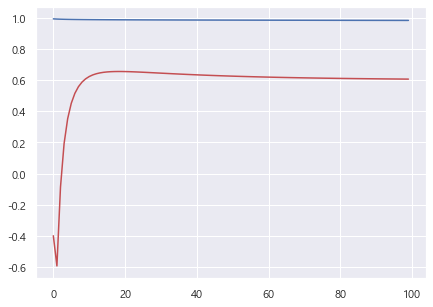

In [139]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [140]:
rid = Ridge(alpha=18.5)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))
rid.coef_

0.9878620968592358
0.6555746643996828


array([  4.95016078, -19.99685188,   3.1967311 ,  -6.83901114,
         0.43129063,   1.93395972,   1.43879374,  -0.70882899,
         8.08024177, -11.25215789,   0.30258262,  19.95646952,
         7.77171652, -21.15049853,   0.53143461,  21.31542194,
         1.29932903,  -2.71251445,  11.0351416 , -10.3045583 ,
         1.33994613,   7.8869427 ,  -3.06844794,  12.50972423,
         1.12523236,  15.91783706,  -0.25595661,  19.49935197,
         7.59699922,  19.68429205,   0.54052345,  -0.53334558,
         6.8335612 ,  -1.92857042,  13.29257536,   5.64847857,
        -1.23193466,   1.10830714,  -6.33988335,   2.05480978,
         0.38247108,  -3.95743635,   1.92929972,  -0.33724606,
        -3.98572146,  -0.69620295,  -8.27461738,  -0.3837603 ,
        19.8703673 ,  -2.92502912,   0.23788417, -12.30040576,
        -0.50467928,  16.34518144,  14.21189024,   0.25972709,
        17.26579176,  -3.12885716,  -0.97441646,  -8.13237758,
         1.59229053,  -2.1500109 ,   5.64061311,   6.41

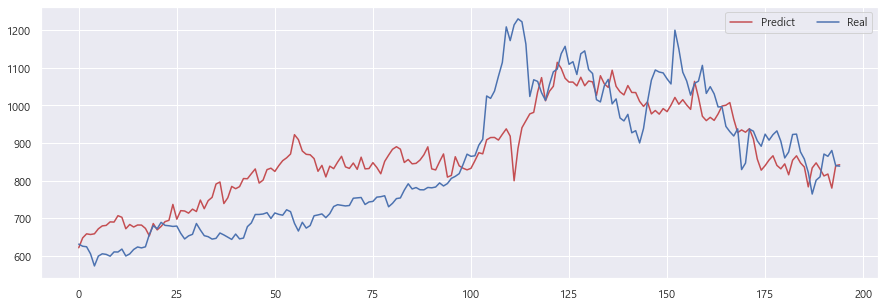

In [141]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

<AxesSubplot:xlabel='0'>

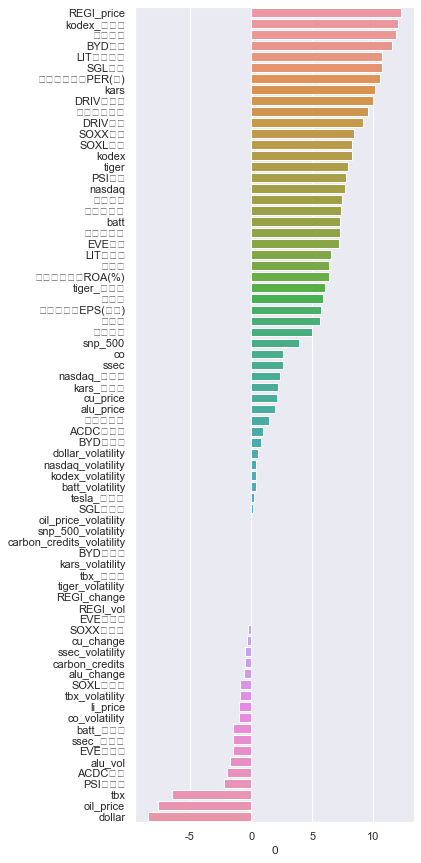

In [142]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
sns.set(rc = {'figure.figsize':(5,15)})
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

In [36]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.9931365382251918
las_test : -2.163088196470908
alpha = 0.0005
las_train : 0.99313905809084
las_test : -2.145223515836677
alpha = 0.001
las_train : 0.9931422052884212
las_test : -2.123089874200943
alpha = 0.005
las_train : 0.9931664273208864
las_test : -1.9479431710227337
alpha = 0.01
las_train : 0.993190361751096
las_test : -1.7398900737670697
alpha = 0.05
las_train : 0.9932376153395953
las_test : -0.33719000142862887
alpha = 0.1
las_train : 0.9930012210404835
las_test : 0.21229748582579544
alpha = 0.5
las_train : 0.9888623567036413
las_test : 0.6402516371913111
alpha = 1
las_train : 0.9864689105467442
las_test : 0.5738226663334918
alpha = 5
las_train : 0.9827469169126019
las_test : 0.6060998155826978
alpha = 10
las_train : 0.9807890344090413
las_test : 0.5930650696084843
alpha = 50
las_train : 0.9345888950768786
las_test : 0.5524741640664206
alpha = 100
las_train : 0.8168076500189431
las_test : -0.3066227632564722
alpha = 500
las_train : 0.0
las_test : -11

In [37]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 10, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 0.35000000000000003
las_train : 0.989869718699241
las_test : 0.6740719298928222


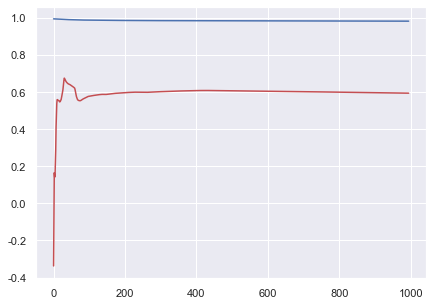

In [38]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [39]:
las = Lasso(alpha=0.35)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
las.coef_

array([ 4.74295356e+00, -1.05897259e+01,  1.05398468e+00, -2.47006577e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.16876897e+01,  6.79991794e-01,  6.10751509e+01,
        4.79968373e+00, -1.73681118e+01,  1.06512772e+00,  3.16516196e+01,
       -0.00000000e+00, -9.28046579e-01,  2.11686378e+01, -7.51112381e+00,
        0.00000000e+00,  0.00000000e+00, -1.98029307e+00,  0.00000000e+00,
        1.34206578e+00,  7.55300758e+00, -0.00000000e+00,  1.32795015e+01,
        5.28121550e+00,  3.94456866e+00,  2.09116257e-02,  7.99835018e-01,
        0.00000000e+00, -1.23281240e+00,  3.08694946e+00,  0.00000000e+00,
       -1.77460949e+00,  1.29432031e+00, -2.58663102e+00,  4.37454035e+00,
       -0.00000000e+00,  0.00000000e+00,  1.00425841e+00, -3.00441528e+00,
       -3.24435653e+00, -0.00000000e+00, -3.08220010e+01,  0.00000000e+00,
        1.41877141e+00, -2.49335904e+00,  2.01198180e-01, -3.82601233e+01,
        0.00000000e+00,  

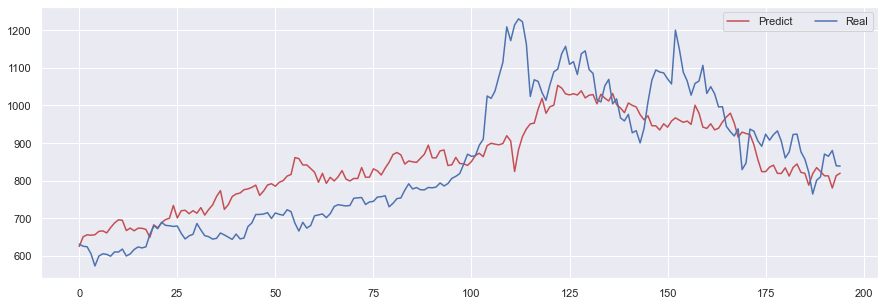

In [40]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [41]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 9.44
ratio = 0.5
ela_train : 0.9471666165941464
ela_test : 0.6890886945389401


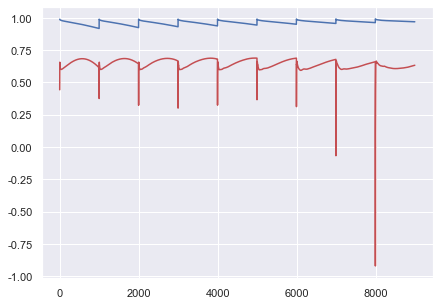

In [42]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [43]:
ela = ElasticNet(l1_ratio=0.5, alpha=9.44)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))
ela.coef_

ela_train : 0.9471666165941464
ela_test : 0.6890886945389401


array([-0.        , -1.24021114,  0.        ,  2.59623771,  0.        ,
        6.74963418, -1.99723053, -0.        ,  7.3050673 ,  4.46885308,
        0.        ,  6.37865772,  5.59916323,  2.09208   ,  2.82643178,
        6.94406381,  3.79081514,  0.        ,  4.39784615,  2.81993457,
        0.        ,  6.43152252,  0.        ,  6.66280868,  0.        ,
        5.93124522, -0.04531099,  7.08740717,  5.27856978,  7.06811226,
        0.        , -0.        ,  2.25174394,  0.        ,  3.03629504,
        6.73909788,  3.91862957,  0.        ,  5.3289249 ,  0.43922419,
        0.        , -6.48616243, -0.        ,  2.81509965, -1.79928061,
        0.        ,  4.32707213,  0.        ,  7.34465881,  1.23351693,
        0.        ,  5.47443599,  0.        ,  6.37893679,  6.58680442,
        0.11033809,  6.42940073,  5.66796415,  0.        , -5.15368298,
        0.25294912,  0.        ,  4.40386353,  5.54622074,  5.17297026,
        6.24534205,  6.61147563,  6.24156896,  7.31334752,  6.71

<AxesSubplot:xlabel='0'>

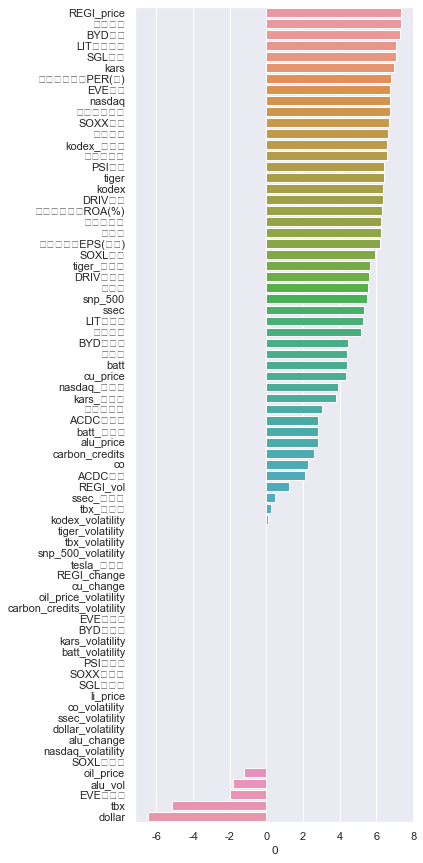

In [44]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
sns.set(rc = {'figure.figsize':(5,15)})
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

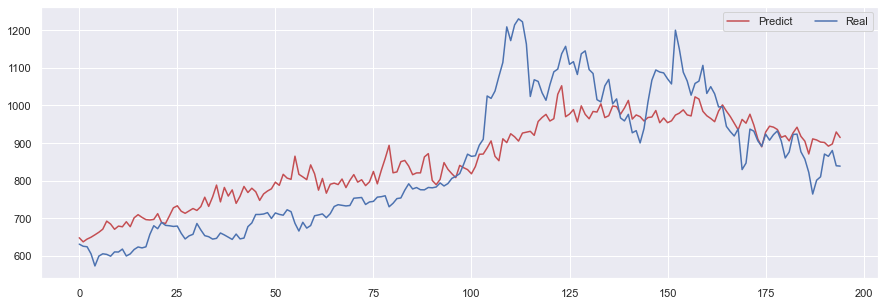

In [45]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [46]:
## 3개의 모델의 오차
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)
print('las RMSE :', mean_squared_error(y_test, preds_las)**0.5)
print('ela RMSE :', mean_squared_error(y_test, preds_ela)**0.5)

rid RMSE : 102.82603132005254
las RMSE : 100.02680832978459
ela RMSE : 97.69532592404461


In [47]:
# train, test 비율 바꿔보기

In [48]:
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [49]:
y = df.tesla
x = df.drop(['date', 'tesla', 'elec_fee', 'tesla_volatility'], axis=1)

In [50]:
# 70 : 30 비율
x_train, x_test = x.iloc[:560], x.iloc[560:]
y_train, y_test = y.iloc[:560], y.iloc[560:]

In [51]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [52]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 100, 0.01):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 3.0100000000000002
rid_train : 0.9916619884547476
rid_test : 0.1798971504232194


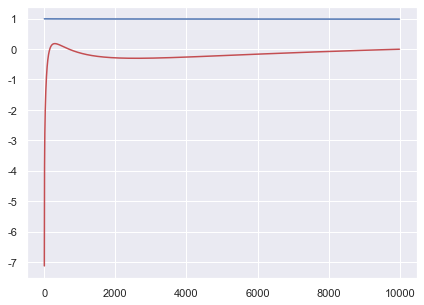

In [53]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [54]:
rid = Ridge(alpha=3.01)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.9916619884547476
0.1798971504232194


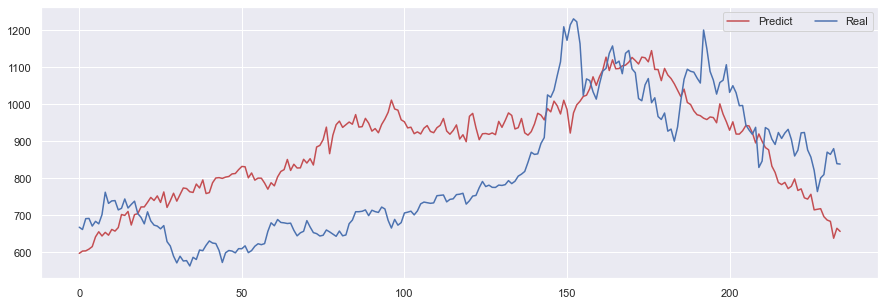

In [55]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [56]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 1, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 0.18000000000000005
las_train : 0.9917871533164382
las_test : 0.5965966322616085


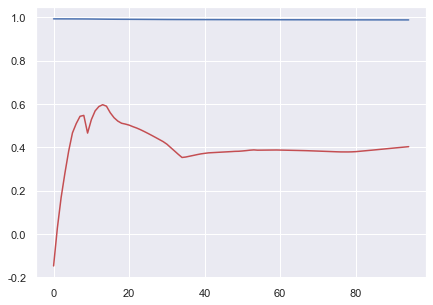

In [57]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [58]:
las = Lasso(alpha=0.18)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)

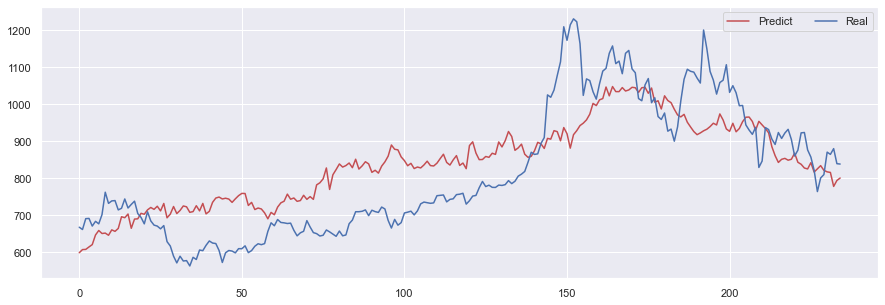

In [59]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [60]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 9.35
ratio = 0.2
ela_train : 0.9288531166680062
ela_test : 0.7085002080649749


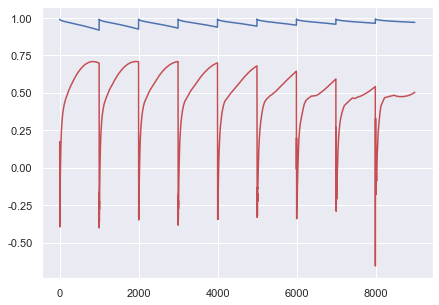

In [61]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [62]:
ela = ElasticNet(l1_ratio=0.2, alpha=9.35)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

ela_train : 0.9288531166680062
ela_test : 0.7085002080649749


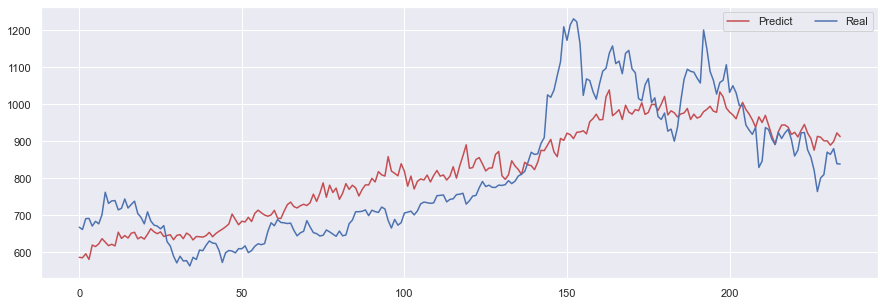

In [63]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [64]:
## 3개의 모델의 오차
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)
print('las RMSE :', mean_squared_error(y_test, preds_las)**0.5)
print('ela RMSE :', mean_squared_error(y_test, preds_ela)**0.5)

rid RMSE : 158.37338566529306
las RMSE : 111.07537812587995
ela RMSE : 94.42068898626852


In [65]:
# feature 조정
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)

In [66]:
# NaN값 채우기
df.interpolate(inplace=True)

In [67]:
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [68]:
# 재무제표 드랍
y = df.tesla
x = df.drop(['date','tesla', 'elec_fee', 'tesla_volatility','snp_500', 'snp_500_volatility',
            '매출액', '매출원가', '매출총이익', '영업이익', '순이익', '자산총계', '매출총이익률', '영업이익률',
       '주당순이익EPS(달러)', '주가수익배수PER(배)', '총자산이익률ROA(%)'], axis=1)

In [69]:
# 75 : 25 비율
x_train, x_test = x.iloc[:600], x.iloc[600:]
y_train, y_test = y.iloc[:600], y.iloc[600:]

In [70]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [71]:
# model 돌려보기
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('lr_train :', lr.score(x_train_scaled,y_train))
print('lr_test :', lr.score(x_test_scaled,y_test))

rid = Ridge()
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
print('='*50)
print('rid_train :', rid.score(x_train_scaled,y_train))
print('rid_test :', rid.score(x_test_scaled,y_test))
las = Lasso()
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
print('='*50)
print('las_train :', las.score(x_train_scaled,y_train))
print('las_test :', las.score(x_test_scaled,y_test))
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('='*50)
print('xgb_train :', xb.score(x_train_scaled,y_train))
print('xgb_test :', xb.score(x_test_scaled,y_test))
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('='*50)
print('lgbm_train :', lgbm.score(x_train_scaled,y_train))
print('lgbm_test :', lgbm.score(x_test_scaled,y_test))
ela = ElasticNet()
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

lr_train : 0.9883456426129648
lr_test : 0.06886668075243896
rid_train : 0.9878283318961614
rid_test : 0.41478315583073844
las_train : 0.9849402779754556
las_test : 0.4866420191836899
xgb_train : 0.9999999910992741
xgb_test : -0.6275664544215733
lgbm_train : 0.9997421287978392
lgbm_test : -0.5750975742246558
ela_train : 0.9758727316774767
ela_test : 0.19510390603439687


In [72]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
print('='*50)
print('cat_test :', r2_score(y_test,preds_cat))

Learning rate set to 0.037768
0:	learn: 248.8303448	total: 6.04ms	remaining: 6.04s
1:	learn: 240.9938252	total: 11.5ms	remaining: 5.72s
2:	learn: 233.8710444	total: 16.7ms	remaining: 5.55s
3:	learn: 226.8142408	total: 21.7ms	remaining: 5.4s
4:	learn: 219.5950161	total: 26.8ms	remaining: 5.34s
5:	learn: 212.7418054	total: 32.2ms	remaining: 5.33s
6:	learn: 205.5303360	total: 37.3ms	remaining: 5.29s
7:	learn: 198.7570409	total: 42.3ms	remaining: 5.24s
8:	learn: 192.3878819	total: 47.1ms	remaining: 5.19s
9:	learn: 186.2223020	total: 51.7ms	remaining: 5.12s
10:	learn: 180.5106562	total: 56.1ms	remaining: 5.04s
11:	learn: 174.9332247	total: 60.4ms	remaining: 4.97s
12:	learn: 169.3106910	total: 64.7ms	remaining: 4.92s
13:	learn: 163.8523937	total: 69ms	remaining: 4.86s
14:	learn: 158.9060667	total: 73.2ms	remaining: 4.81s
15:	learn: 153.9242628	total: 77.6ms	remaining: 4.77s
16:	learn: 149.1258779	total: 82.4ms	remaining: 4.76s
17:	learn: 144.6101616	total: 86.9ms	remaining: 4.74s
18:	learn: 

185:	learn: 14.4165663	total: 846ms	remaining: 3.7s
186:	learn: 14.3557006	total: 851ms	remaining: 3.7s
187:	learn: 14.2856916	total: 856ms	remaining: 3.7s
188:	learn: 14.1806629	total: 862ms	remaining: 3.7s
189:	learn: 14.1003109	total: 867ms	remaining: 3.69s
190:	learn: 14.0686773	total: 871ms	remaining: 3.69s
191:	learn: 14.0287816	total: 876ms	remaining: 3.69s
192:	learn: 13.9475824	total: 881ms	remaining: 3.68s
193:	learn: 13.8620653	total: 886ms	remaining: 3.68s
194:	learn: 13.8081910	total: 891ms	remaining: 3.68s
195:	learn: 13.7558190	total: 896ms	remaining: 3.67s
196:	learn: 13.6898258	total: 900ms	remaining: 3.67s
197:	learn: 13.6516549	total: 904ms	remaining: 3.66s
198:	learn: 13.5673048	total: 909ms	remaining: 3.66s
199:	learn: 13.4974192	total: 913ms	remaining: 3.65s
200:	learn: 13.4804712	total: 917ms	remaining: 3.64s
201:	learn: 13.4005185	total: 921ms	remaining: 3.64s
202:	learn: 13.3542628	total: 925ms	remaining: 3.63s
203:	learn: 13.2652272	total: 930ms	remaining: 3.6

347:	learn: 8.0502195	total: 1.58s	remaining: 2.96s
348:	learn: 8.0086834	total: 1.58s	remaining: 2.96s
349:	learn: 7.9869123	total: 1.59s	remaining: 2.95s
350:	learn: 7.9569781	total: 1.59s	remaining: 2.95s
351:	learn: 7.9326422	total: 1.6s	remaining: 2.94s
352:	learn: 7.9275757	total: 1.6s	remaining: 2.94s
353:	learn: 7.9225418	total: 1.61s	remaining: 2.93s
354:	learn: 7.8994396	total: 1.61s	remaining: 2.93s
355:	learn: 7.8642483	total: 1.62s	remaining: 2.92s
356:	learn: 7.8313942	total: 1.62s	remaining: 2.92s
357:	learn: 7.8128428	total: 1.63s	remaining: 2.91s
358:	learn: 7.7878908	total: 1.63s	remaining: 2.91s
359:	learn: 7.7687475	total: 1.63s	remaining: 2.9s
360:	learn: 7.7497463	total: 1.64s	remaining: 2.9s
361:	learn: 7.7244385	total: 1.64s	remaining: 2.89s
362:	learn: 7.6812910	total: 1.65s	remaining: 2.89s
363:	learn: 7.6562767	total: 1.65s	remaining: 2.88s
364:	learn: 7.6289240	total: 1.65s	remaining: 2.88s
365:	learn: 7.5972555	total: 1.66s	remaining: 2.87s
366:	learn: 7.58

523:	learn: 5.0286007	total: 2.43s	remaining: 2.21s
524:	learn: 5.0255387	total: 2.44s	remaining: 2.21s
525:	learn: 5.0063403	total: 2.44s	remaining: 2.2s
526:	learn: 4.9893065	total: 2.45s	remaining: 2.2s
527:	learn: 4.9812316	total: 2.46s	remaining: 2.19s
528:	learn: 4.9599426	total: 2.46s	remaining: 2.19s
529:	learn: 4.9494665	total: 2.47s	remaining: 2.19s
530:	learn: 4.9301305	total: 2.47s	remaining: 2.18s
531:	learn: 4.9088547	total: 2.48s	remaining: 2.18s
532:	learn: 4.8927111	total: 2.48s	remaining: 2.17s
533:	learn: 4.8765067	total: 2.49s	remaining: 2.17s
534:	learn: 4.8616386	total: 2.49s	remaining: 2.17s
535:	learn: 4.8582283	total: 2.5s	remaining: 2.16s
536:	learn: 4.8530900	total: 2.5s	remaining: 2.16s
537:	learn: 4.8338803	total: 2.51s	remaining: 2.15s
538:	learn: 4.8295210	total: 2.51s	remaining: 2.15s
539:	learn: 4.8241435	total: 2.52s	remaining: 2.14s
540:	learn: 4.8098962	total: 2.52s	remaining: 2.14s
541:	learn: 4.8081777	total: 2.52s	remaining: 2.13s
542:	learn: 4.79

706:	learn: 3.2072103	total: 3.31s	remaining: 1.37s
707:	learn: 3.2038799	total: 3.32s	remaining: 1.37s
708:	learn: 3.1958684	total: 3.32s	remaining: 1.36s
709:	learn: 3.1886877	total: 3.33s	remaining: 1.36s
710:	learn: 3.1812011	total: 3.33s	remaining: 1.35s
711:	learn: 3.1722676	total: 3.34s	remaining: 1.35s
712:	learn: 3.1611743	total: 3.34s	remaining: 1.34s
713:	learn: 3.1462595	total: 3.35s	remaining: 1.34s
714:	learn: 3.1372603	total: 3.35s	remaining: 1.34s
715:	learn: 3.1362679	total: 3.36s	remaining: 1.33s
716:	learn: 3.1318597	total: 3.36s	remaining: 1.33s
717:	learn: 3.1272195	total: 3.37s	remaining: 1.32s
718:	learn: 3.1168399	total: 3.37s	remaining: 1.32s
719:	learn: 3.1154869	total: 3.38s	remaining: 1.31s
720:	learn: 3.1103987	total: 3.38s	remaining: 1.31s
721:	learn: 3.1058819	total: 3.39s	remaining: 1.3s
722:	learn: 3.1005852	total: 3.39s	remaining: 1.3s
723:	learn: 3.0954823	total: 3.39s	remaining: 1.29s
724:	learn: 3.0861645	total: 3.4s	remaining: 1.29s
725:	learn: 3.0

894:	learn: 2.0050367	total: 4.2s	remaining: 492ms
895:	learn: 1.9969585	total: 4.2s	remaining: 488ms
896:	learn: 1.9922034	total: 4.21s	remaining: 483ms
897:	learn: 1.9892513	total: 4.21s	remaining: 478ms
898:	learn: 1.9840151	total: 4.22s	remaining: 474ms
899:	learn: 1.9781623	total: 4.22s	remaining: 469ms
900:	learn: 1.9724579	total: 4.23s	remaining: 464ms
901:	learn: 1.9649067	total: 4.23s	remaining: 460ms
902:	learn: 1.9574429	total: 4.24s	remaining: 455ms
903:	learn: 1.9516545	total: 4.24s	remaining: 450ms
904:	learn: 1.9436556	total: 4.25s	remaining: 446ms
905:	learn: 1.9399792	total: 4.25s	remaining: 441ms
906:	learn: 1.9346567	total: 4.25s	remaining: 436ms
907:	learn: 1.9284455	total: 4.26s	remaining: 432ms
908:	learn: 1.9238884	total: 4.26s	remaining: 427ms
909:	learn: 1.9206409	total: 4.27s	remaining: 422ms
910:	learn: 1.9130057	total: 4.27s	remaining: 418ms
911:	learn: 1.9094203	total: 4.28s	remaining: 413ms
912:	learn: 1.9050977	total: 4.28s	remaining: 408ms
913:	learn: 1.

In [73]:
# rid 계수 바꿔보기
for i in [0.0001,0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('rid_train :', rid.score(x_train_scaled,y_train))
    print('rid_test :', rid.score(x_test_scaled,y_test))

alpha = 0.0001
rid_train : 0.988345642559713
rid_test : 0.06920582558696131
alpha = 0.0005
rid_train : 0.9883456412869752
rid_test : 0.07055679446475649
alpha = 0.001
rid_train : 0.9883456373351989
rid_test : 0.07223299633957336
alpha = 0.005
rid_train : 0.9883455156051374
rid_test : 0.08516348341294622
alpha = 0.01
rid_train : 0.9883451566417788
rid_test : 0.1002217842901264
alpha = 0.05
rid_train : 0.9883364140538645
rid_test : 0.1892921726276524
alpha = 0.1
rid_train : 0.9883167699134587
rid_test : 0.25486826747461566
alpha = 0.5
rid_train : 0.9880907825145256
rid_test : 0.38261155010125825
alpha = 1
rid_train : 0.9878283318961614
rid_test : 0.41478315583073844
alpha = 5
rid_train : 0.9867883685454407
rid_test : 0.478973599697158
alpha = 10
rid_train : 0.9861958498376213
rid_test : 0.4858468521445676
alpha = 100
rid_train : 0.9818340910281516
rid_test : 0.3111835930681801


In [74]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 10, 0.01):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 8.750000000000002
rid_train : 0.9863202128996943
rid_test : 0.48633054941629494


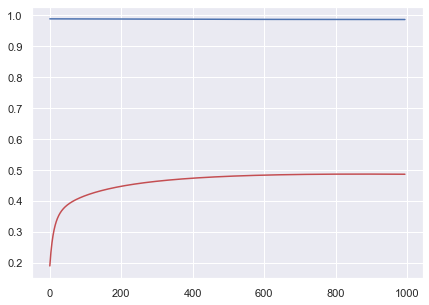

In [75]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [76]:
rid = Ridge(alpha=8.75)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.9863202128996943
0.48633054941629494


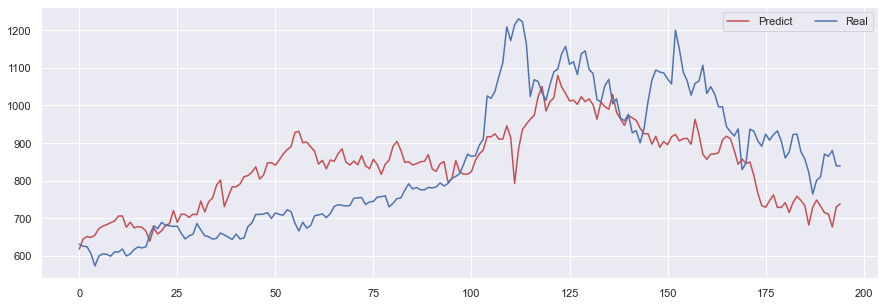

In [77]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [78]:
# las 계수 바꿔보기
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    print('='*50)
    print('alpha =', i)
    print('las_train :', las.score(x_train_scaled,y_train))
    print('las_test :', las.score(x_test_scaled,y_test))

alpha = 0.0001
las_train : 0.9880560792250003
las_test : 0.1834998128404305
alpha = 0.0005
las_train : 0.9880583322523542
las_test : 0.18638684791746662
alpha = 0.001
las_train : 0.9880611099139198
las_test : 0.1899246090275687
alpha = 0.005
las_train : 0.988081767158997
las_test : 0.21555313345583893
alpha = 0.01
las_train : 0.9881034249631966
las_test : 0.24982949679783595
alpha = 0.05
las_train : 0.9880613510004338
las_test : 0.37950578371345833
alpha = 0.1
las_train : 0.987762160863312
las_test : 0.4417364075232859
alpha = 0.5
las_train : 0.9859752291708443
las_test : 0.5101336906428149
alpha = 1
las_train : 0.9849402779754556
las_test : 0.4866420191836899
alpha = 5
las_train : 0.9784014794295299
las_test : 0.37955588495680903
alpha = 10
las_train : 0.9750675499049379
las_test : 0.3564547772223584
alpha = 50
las_train : 0.9258818655471847
las_test : 0.4072810512483763
alpha = 100
las_train : 0.8067173954388022
las_test : -0.41552099195551784
alpha = 500
las_train : 0.0
las_test : -

In [79]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 1, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 0.31000000000000005
las_train : 0.9865850800655864
las_test : 0.513392224229129


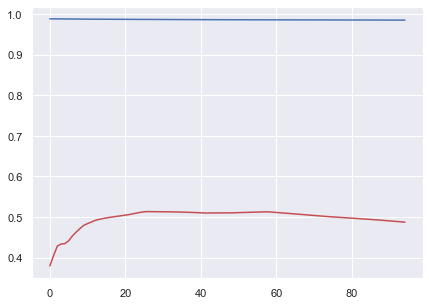

In [80]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [81]:
las = Lasso(alpha=0.31)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
las.coef_

array([ 2.36849968e+00, -3.29873186e+01,  6.49409935e+00, -6.55383559e+00,
        0.00000000e+00, -1.24670917e+01,  5.84470765e-01, -3.61877706e-01,
        0.00000000e+00, -1.08329395e+01, -0.00000000e+00,  0.00000000e+00,
        3.88646004e+00, -3.35866480e+01,  2.23942014e+00,  9.12265305e+01,
        6.52347501e-02, -1.17417337e+00, -0.00000000e+00, -8.06747146e+00,
        0.00000000e+00, -0.00000000e+00, -1.81585406e+00,  0.00000000e+00,
        5.90044229e-01, -0.00000000e+00,  0.00000000e+00,  8.84961864e+01,
        4.92808361e+00,  1.39811747e+01, -0.00000000e+00,  0.00000000e+00,
        1.28320344e+01, -1.91835639e+00,  2.40800378e+01,  0.00000000e+00,
       -1.28258441e+00,  0.00000000e+00, -0.00000000e+00, -2.46959807e+00,
       -0.00000000e+00, -8.75312819e+00,  2.89892433e+00,  0.00000000e+00,
       -9.80925545e+00, -3.65592528e-01,  0.00000000e+00, -1.32660268e+00,
        2.73857387e+01, -1.15123167e+00, -1.49303150e-02,  0.00000000e+00,
        7.29985705e+00, -

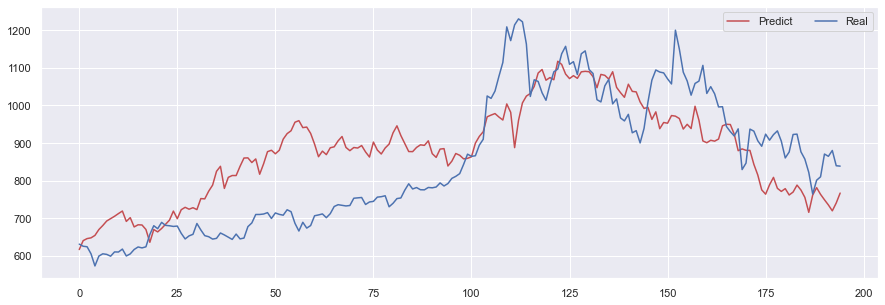

In [82]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [83]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 0.05
ratio = 0.8
ela_train : 0.9865732574937612
ela_test : 0.5270784317717834


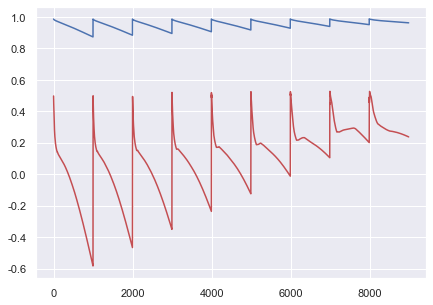

In [84]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [85]:
ela = ElasticNet(l1_ratio=0.8, alpha=0.05)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

ela_train : 0.9865732574937612
ela_test : 0.5270784317717834


In [86]:
ela.coef_

array([  3.27696012, -29.36131208,   5.92456033, -10.07266328,
         0.25798468, -14.33366867,   1.41156072,  -0.62141205,
        14.11620952, -12.30862397,   0.16734879,  28.3660336 ,
         4.92723801, -31.01285018,   1.78119678,  40.80065596,
         1.58422952,  -1.85382402,  -3.12407907, -10.17991124,
         2.56951974,   4.58258343,  -2.85662034,  25.38317705,
         0.48533205,  -6.86129594,   0.46602527,  41.1187995 ,
         7.30090653,  37.28844011,  -0.34795502,  -0.        ,
        11.55212666,  -2.41775274,  20.69729454,   3.79121876,
        -1.26638246,  -0.11658116,  -1.56997563,  -1.11666208,
         0.11489491, -12.30571017,   3.21685051,   0.20923727,
        -9.95611955,  -0.34525135,   0.        ,  -1.38282255,
        27.44859625,  -2.28540431,  -0.41242069,  18.94388147,
        11.38254663,   0.        ,  25.18086964,  -4.69900437,
        -1.05377199, -19.6885694 ,   1.65008029,  -1.94421618,
         5.30020395])

<AxesSubplot:xlabel='0'>

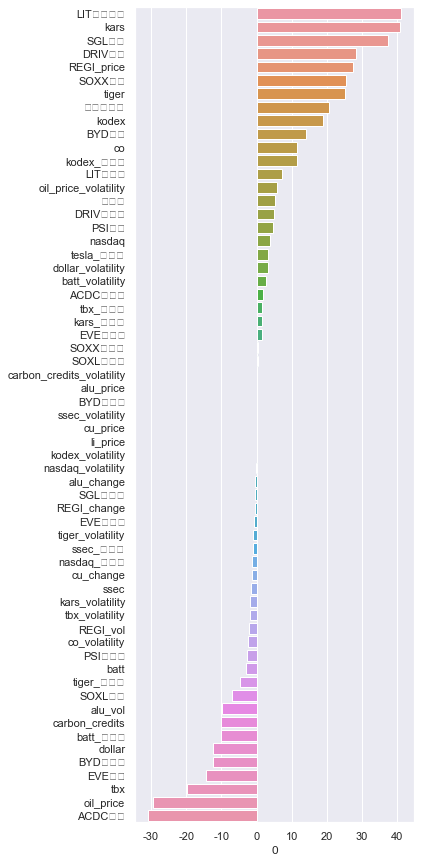

In [87]:
coef_df = pd.DataFrame(ela.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)
sns.set(rc = {'figure.figsize':(5,15)})
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

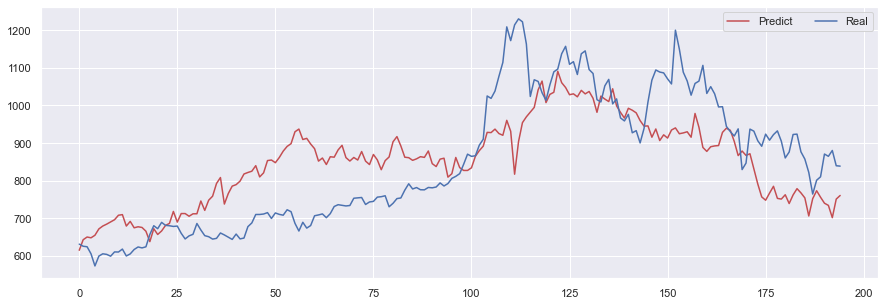

In [88]:
# etf종목 거래량이 갑자기 떨어진 날이 있음
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [89]:
## 3개의 모델의 오차
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)
print('las RMSE :', mean_squared_error(y_test, preds_las)**0.5)
print('ela RMAE :', mean_squared_error(y_test, preds_ela)**0.5)

rid RMSE : 125.57332613399318
las RMSE : 122.22078004880919
ela RMAE : 120.48974617065755


In [90]:
# train, test 비율 바꿔보기

In [91]:
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [92]:
# 재무제표 드랍
y = df.tesla
x = df.drop(['date','tesla', 'elec_fee', 'tesla_volatility','snp_500', 'snp_500_volatility',
            '매출액', '매출원가', '매출총이익', '영업이익', '순이익', '자산총계', '매출총이익률', '영업이익률',
       '주당순이익EPS(달러)', '주가수익배수PER(배)', '총자산이익률ROA(%)'], axis=1)

In [93]:
# 70 : 30 비율
x_train, x_test = x.iloc[:560], x.iloc[560:]
y_train, y_test = y.iloc[:560], y.iloc[560:]

In [94]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [95]:
# rid 계수 확인하기
max_score = -20
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 1000, 1):
    rid = Ridge(alpha=i)
    rid.fit(x_train_scaled, y_train)
    preds_rid = rid.predict(x_test_scaled)
    test_li.append(rid.score(x_test_scaled,y_test))
    train_li.append(rid.score(x_train_scaled,y_train))
    if max_score < rid.score(x_test_scaled,y_test):
        max_score = rid.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = rid.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('rid_train :', train_score)
print('rid_test :', max_score)

alpha = 34.05
rid_train : 0.9857537885350844
rid_test : 0.47119573336308274


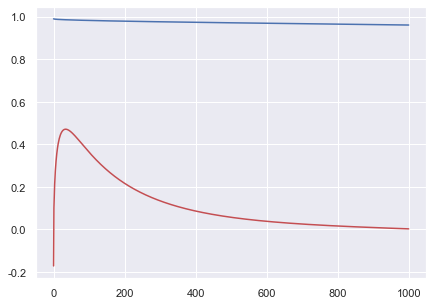

In [96]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [97]:
rid = Ridge(alpha=34.05)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

0.9857537885350844
0.47119573336308274


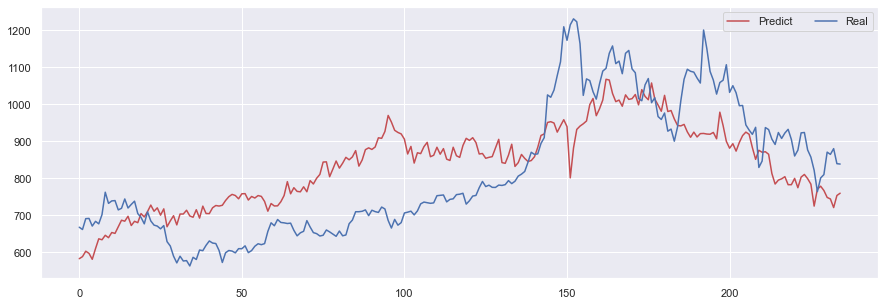

In [98]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [99]:
# las 계수 찾기
max_score = -99
max_alpha = 0
train_score = 0
test_li = []
train_li = []
for i in np.arange(0.05, 100, 0.01):
    las = Lasso(alpha=i)
    las.fit(x_train_scaled, y_train)
    preds_las = las.predict(x_test_scaled)
    test_li.append(las.score(x_test_scaled,y_test))
    train_li.append(las.score(x_train_scaled,y_train))
    if max_score < las.score(x_test_scaled,y_test):
        max_score = las.score(x_test_scaled,y_test)
        max_alpha = i
        train_score = las.score(x_train_scaled,y_train)
        
print('alpha =', max_alpha)
print('las_train :', train_score)
print('las_test :', max_score)

alpha = 43.400000000000006
las_train : 0.9297101754315596
las_test : 0.4952414817276226


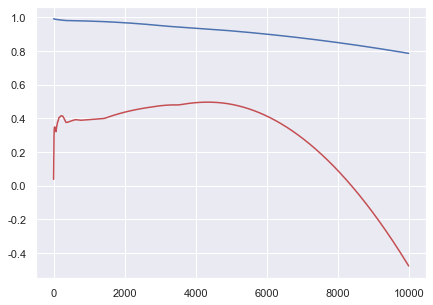

In [100]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [101]:
las = Lasso(alpha=43.4)
las.fit(x_train_scaled, y_train)
preds_las = las.predict(x_test_scaled)
las.coef_

array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
       51.53113087, -0.        , -0.        ,  1.365425  ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 45.17081276,  0.        , 54.23196526,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       44.64869891,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ])

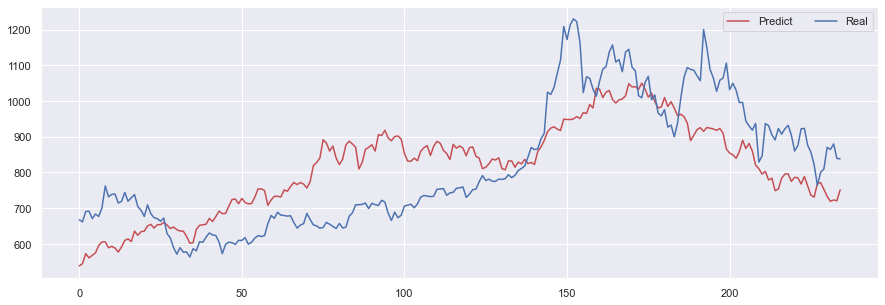

In [102]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_las)),preds_las, c='r', label='Predict')
plt.plot(range(0,len(preds_las)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [103]:
# elastic 계수 바꿔보기
max_score = 0
max_alpha = 0
train_score = 0
max_ratio = 0
test_li = []
train_li = []
for rat in np.arange(0.1,1,0.1):
    for alp in np.arange(0.01,10,0.01):
        ela = ElasticNet(l1_ratio=rat, alpha=alp)
        ela.fit(x_train_scaled, y_train)
        preds_ela = ela.predict(x_test_scaled)
        test_li.append(ela.score(x_test_scaled,y_test))
        train_li.append(ela.score(x_train_scaled,y_train))
        if max_score < ela.score(x_test_scaled,y_test):
            max_score = ela.score(x_test_scaled,y_test)
            max_alpha = alp
            max_ratio = rat
            train_score = ela.score(x_train_scaled,y_train)
print('alpha =', max_alpha)
print('ratio =', max_ratio)
print('ela_train :', train_score)
print('ela_test :', max_score)

alpha = 0.61
ratio = 0.9
ela_train : 0.9845276847246774
ela_test : 0.5422393228223704


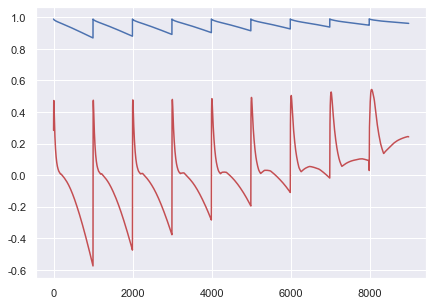

In [104]:
plt.figure(figsize=(7,5))
plt.plot(test_li, c='r')
plt.plot(train_li, c='b')

In [105]:
ela = ElasticNet(l1_ratio=0.9, alpha=0.61)
ela.fit(x_train_scaled, y_train)
preds_ela = ela.predict(x_test_scaled)
print('='*50)
print('ela_train :', ela.score(x_train_scaled,y_train))
print('ela_test :', ela.score(x_test_scaled,y_test))

ela_train : 0.9845276847246774
ela_test : 0.5422393228223704


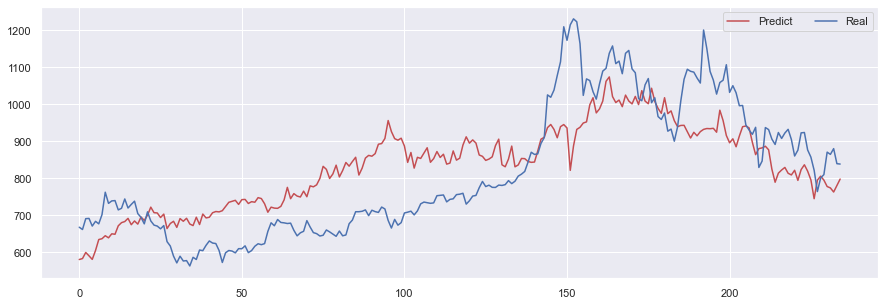

In [106]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_ela)),preds_ela, c='r', label='Predict')
plt.plot(range(0,len(preds_ela)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [107]:
## 3개의 모델의 오차
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)
print('las RMSE :', mean_squared_error(y_test, preds_las)**0.5)
print('ela RMSE :', mean_squared_error(y_test, preds_ela)**0.5)

rid RMSE : 127.17317555131334
las RMSE : 124.24813226062297
ela RMSE : 118.3224849866139


In [108]:
from itertools import combinations

In [109]:
# 10개의 무작위 column 조합
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
# NaN값 채우기
df.interpolate(inplace=True)
# 5일 shift
df.tesla = df.tesla.shift(-5)
df.dropna(inplace=True)

In [110]:
cols = df.columns.to_list()
cols = cols[5:]

In [111]:
max_score = -99
max_alpha = 0
train_score = 0
max_col = []
for combi in combinations(cols, 10):
    col = list(combi)
    y = df.tesla
    x = df[col]
    # 70 : 30 비율
    x_train, x_test = x.iloc[:560], x.iloc[560:]
    y_train, y_test = y.iloc[:560], y.iloc[560:]
    scaled = StandardScaler()
    scaled.fit(x_train)
    x_train_scaled = scaled.transform(x_train)
    x_test_scaled = scaled.transform(x_test)
    for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
        rid = Ridge(alpha=i)
        rid.fit(x_train_scaled, y_train)
        preds_rid = rid.predict(x_test_scaled)
        if max_score < rid.score(x_test_scaled,y_test):
            max_score = rid.score(x_test_scaled,y_test)
            max_alpha = i
            max_col = col
            train_score = rid.score(x_train_scaled,y_train)

KeyboardInterrupt: 

In [ ]:
print(max_col)
print(max_alpha)
print(max_score)
print(train_score)

In [ ]:
y = df.tesla
x = df[['oil_price', 'oil_price_volatility', 'carbon_credits', 'carbon_credits_volatility', 'EVE종가',
        'EVE거래량', 'EVE변동률', 'kars', 'li_price', '주가수익배수PER(배)']]
# 75 : 25 비율
x_train, x_test = x.iloc[:560], x.iloc[560:]
y_train, y_test = y.iloc[:560], y.iloc[560:]
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)
rid = Ridge(alpha=10)
rid.fit(x_train_scaled, y_train)
preds_rid = rid.predict(x_test_scaled)
rid.coef_
print(rid.score(x_train_scaled,y_train))
print(rid.score(x_test_scaled,y_test))

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(0,len(preds_rid)),preds_rid, c='r', label='Predict')
plt.plot(range(0,len(preds_rid)),y_test, c='b', label='Real')
plt.legend(loc='best', ncol=2) 
plt.show()

In [ ]:
print('rid RMSE :', mean_squared_error(y_test, preds_rid)**0.5)